In [13]:
"""
Sentiment Analysis of Movie Reviews using NLTK and Scikit-Learn
Classifies movie reviews as Positive or Negative
"""

import nltk
import random
import pandas as pd
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download movie reviews dataset
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [3]:
# Prepare the dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

featuresets = [(find_features(rev), category) for (rev, category) in documents]

features = [feature for feature, category in featuresets]
labels = [category for feature, category in featuresets]

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

In [5]:
# Convert features to DataFrame for TfidfVectorizer
train_df = pd.DataFrame(X_train)
test_df = pd.DataFrame(X_test)

# Convert boolean features to string representation
train_texts = [' '.join([word for word, present in row.items() if present]) for index, row in train_df.iterrows()]
test_texts = [' '.join([word for word, present in row.items() if present]) for index, row in test_df.iterrows()]

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(train_texts)
X_test_vec = vectorizer.transform(test_texts)

In [6]:
# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [7]:
# Evaluate the classifier
y_pred = classifier.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nConfusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.82

Confusion Matrix:
[[214  43]
 [ 49 194]]

Classification Report:
              precision    recall  f1-score   support

         neg       0.81      0.83      0.82       257
         pos       0.82      0.80      0.81       243

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



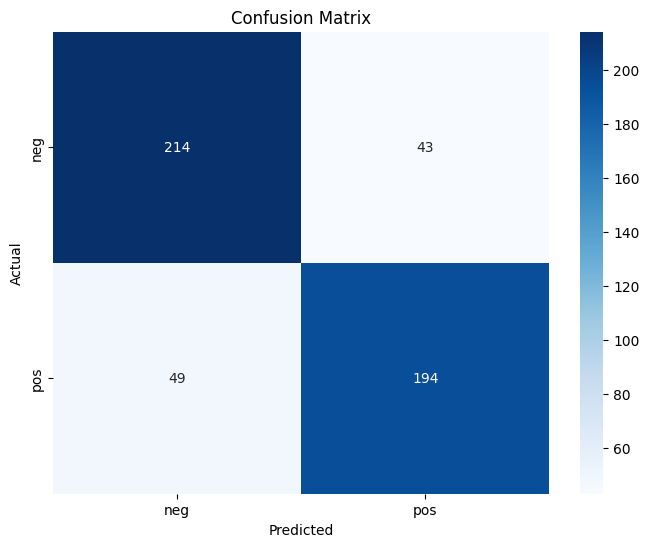

In [8]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
def predict_sentiment(review):
    # Convert the review to the same feature format as the training data
    review_words = review.lower().split()
    review_features = {}
    for w in word_features:
        review_features[w] = (w in review_words)

    # Convert the features to a DataFrame and then to a string representation
    review_df = pd.DataFrame([review_features])
    review_text = [' '.join([word for word, present in row.items() if present]) for index, row in review_df.iterrows()]

    # Vectorize the review text using the same vectorizer used for training
    review_vec = vectorizer.transform(review_text)

    # Predict the sentiment
    prediction = classifier.predict(review_vec)
    return prediction[0]

# Get input from the user
user_review = input("Enter a movie review: ")

# Predict and print the sentiment
sentiment = predict_sentiment(user_review)
print(f"The sentiment of the review is: {sentiment}")

Enter a movie review: movie was a waste of time
The sentiment of the review is: neg
